In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
upload=files.upload()

Saving DCOILBRENTEU.csv to DCOILBRENTEU.csv


In [3]:
missing_values=['na','N/a',np.nan]
data=pd.read_csv('DCOILBRENTEU.csv',na_values=missing_values)
data

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9519,2023-11-14,84.2
9520,2023-11-15,82.4
9521,2023-11-16,77.73
9522,2023-11-17,81.22


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          9524 non-null   object
 1   DCOILBRENTEU  9524 non-null   object
dtypes: object(2)
memory usage: 148.9+ KB


In [5]:
data.shape

(9524, 2)

In [6]:
data.fillna(0)

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9519,2023-11-14,84.2
9520,2023-11-15,82.4
9521,2023-11-16,77.73
9522,2023-11-17,81.22


In [7]:
data.isnull().sum()

DATE            0
DCOILBRENTEU    0
dtype: int64

In [8]:
data['DATE'] = pd.to_datetime(data['DATE'])
print(data)

           DATE DCOILBRENTEU
0    1987-05-20        18.63
1    1987-05-21        18.45
2    1987-05-22        18.55
3    1987-05-25        18.60
4    1987-05-26        18.63
...         ...          ...
9519 2023-11-14         84.2
9520 2023-11-15         82.4
9521 2023-11-16        77.73
9522 2023-11-17        81.22
9523 2023-11-20        83.25

[9524 rows x 2 columns]


In [9]:
data['DCOILBRENTEU'] = pd.to_numeric(data['DCOILBRENTEU'], errors='coerce')

<Axes: >

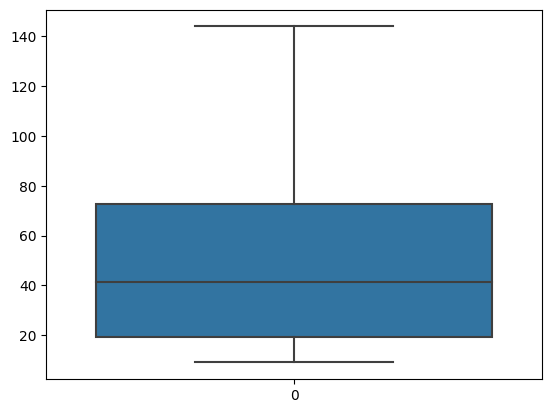

In [10]:
sns.boxplot(data['DCOILBRENTEU'])

In [11]:
data['DATE'] = pd.to_datetime(data['DATE'])  # Convert 'Date' to datetime format
Q1 = data['DCOILBRENTEU'].quantile(0.25)
Q3 = data['DCOILBRENTEU'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out rows with closing values outside the bounds
data = data[(data['DCOILBRENTEU'] >= lower_bound) & (data['DCOILBRENTEU'] <= upper_bound)]
data['DATE'] = pd.to_datetime(data['DATE'], unit='s')
print(data)


           DATE  DCOILBRENTEU
0    1987-05-20         18.63
1    1987-05-21         18.45
2    1987-05-22         18.55
3    1987-05-25         18.60
4    1987-05-26         18.63
...         ...           ...
9519 2023-11-14         84.20
9520 2023-11-15         82.40
9521 2023-11-16         77.73
9522 2023-11-17         81.22
9523 2023-11-20         83.25

[9265 rows x 2 columns]


<ipython-input-11-41cbc2ada043>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DATE'] = pd.to_datetime(data['DATE'], unit='s')


<Axes: >

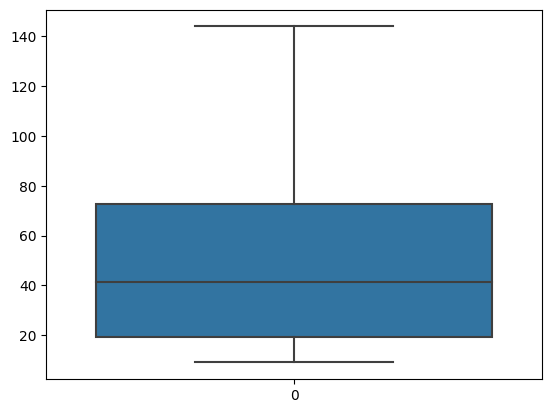

In [12]:
sns.boxplot(data['DCOILBRENTEU'])

In [13]:
data1=data.copy()
data1

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9519,2023-11-14,84.20
9520,2023-11-15,82.40
9521,2023-11-16,77.73
9522,2023-11-17,81.22


In [14]:
px.scatter(data,x='DATE',y='DCOILBRENTEU')

In [15]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(data.DATE), y=list(data['DCOILBRENTEU'])))
fig.update_layout(title_text="Time series with range slider and selectors")
fig.update_layout(xaxis=dict(rangeselector=dict(buttons=list([dict(count=1,
                     label="1m",step="month",stepmode="backward"),dict(count=6,label="6m",step="month",stepmode="backward"),dict(count=1,label="YTD",
                     step="year",stepmode="todate"),dict(count=1,label="1y",step="year",stepmode="backward"),dict(step="all")])),rangeslider=dict( visible=True),type="date"))

fig.show()

1.   Oil prices reached a record high of $141.47 a barrel in  
     July 2008, due to a combination of factors that created an imbalance between supply and demand. Some of these factors were Middle East tension, soaring demand from China, the falling value of the U.S. dollar, declining petroleum reserves, and worries over peak oil.
2.   The impact of the COVID-19 pandemic hammered the oil
     industry in 2020, forcing oil prices to go negative for the first time on record

<ipython-input-16-b29a95c4101d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='DCOILBRENTEU', ylabel='Density'>

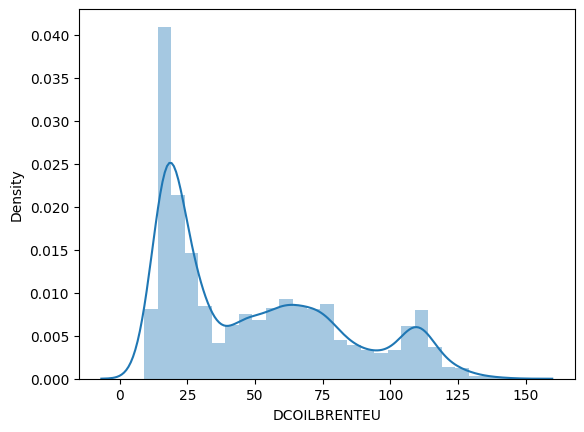

In [16]:
sns.distplot(data['DCOILBRENTEU'])

In [17]:
px.histogram(data["DCOILBRENTEU"])

##**MODEL BUILDING**

In [18]:
from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [19]:
data

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9519,2023-11-14,84.20
9520,2023-11-15,82.40
9521,2023-11-16,77.73
9522,2023-11-17,81.22


In [20]:
data.rename(columns={'DCOILBRENTEU':'Price'},inplace=True)

In [21]:
data['t'] = np.arange(1,len(data)+1)
data['t_squared']=np.square(data['t'])
data['t_log']=np.log(data['t'])
data['log_Price']=np.log(data['Price'])
data["month"] = data.DATE.dt.strftime("%b") # month extraction
data["year"] = data.DATE.dt.strftime("%Y")  # year extraction
months = pd.get_dummies(data['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
data = pd.concat([data,months],axis=1)

data

,DATE,Price,t,t_squared,t_log,log_Price,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1987-05-20,18.63,1,1,0.000000,2.924773,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
1,1987-05-21,18.45,2,4,0.693147,2.915064,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
2,1987-05-22,18.55,3,9,1.098612,2.920470,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
3,1987-05-25,18.60,4,16,1.386294,2.923162,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
4,1987-05-26,18.63,5,25,1.609438,2.924773,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9519,2023-11-14,84.20,9261,85766121,9.133567,4.433195,Nov,2023,0,0,0,0,0,0,0,0,0,0,1,0
9520,2023-11-15,82.40,9262,85784644,9.133675,4.411585,Nov,2023,0,0,0,0,0,0,0,0,0,0,1,0
9521,2023-11-16,77.73,9263,85803169,9.133783,4.353241,Nov,2023,0,0,0,0,0,0,0,0,0,0,1,0
9522,2023-11-17,81.22,9264,85821696,9.133891,4.397162,Nov,2023,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
data.columns

Index(['DATE', 'Price', 't', 't_squared', 't_log', 'log_Price', 'month',
       'year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [23]:
size=9000 #75% of actual data
train_data=data.iloc[:size]
test_data=data.iloc[size:]
train_data

,DATE,Price,t,t_squared,t_log,log_Price,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1987-05-20,18.63,1,1,0.000000,2.924773,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
1,1987-05-21,18.45,2,4,0.693147,2.915064,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
2,1987-05-22,18.55,3,9,1.098612,2.920470,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
3,1987-05-25,18.60,4,16,1.386294,2.923162,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
4,1987-05-26,18.63,5,25,1.609438,2.924773,May,1987,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,2022-10-26,92.93,8996,80928016,9.104535,4.531847,Oct,2022,0,0,0,0,0,0,0,0,0,1,0,0
9246,2022-10-27,94.17,8997,80946009,9.104646,4.545102,Oct,2022,0,0,0,0,0,0,0,0,0,1,0,0
9247,2022-10-28,94.64,8998,80964004,9.104758,4.550080,Oct,2022,0,0,0,0,0,0,0,0,0,1,0,0
9248,2022-10-31,93.30,8999,80982001,9.104869,4.535820,Oct,2022,0,0,0,0,0,0,0,0,0,1,0,0


##**LINEAR MODEL**

In [24]:
linear_model = smf.ols('Price~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Price'])-np.array(pred_linear))**2))
rmse_linear

9.510346250970828

##**ADDICTIVE SEASONALITY**

In [25]:
add_sea = smf.ols('Price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Price'])-np.array(pred_add_sea))**2))
rmse_add_sea

35.87455641786133

##**QUADRATIVE MODEL**

In [26]:
quad=smf.ols('Price~t+t_squared',data=train_data).fit()
pred_quad=pd.Series(quad.predict(test_data[['t','t_squared']]))
rmse_quad=np.sqrt(np.mean((np.array(test_data['Price'])-np.array(pred_quad))**2))
rmse_quad

6.680696632471415

##**ADDITIVE SEASONALITY QUADRATIVE**

In [27]:
add_sea_quad=smf.ols('Price~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(test_data[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test_data['Price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

7.172641497473197

##**MULTIPLE SEASONALITY**

In [28]:
mul_sea = smf.ols('log_Price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test_data))
rmse_mult_sea = np.sqrt(np.mean((np.array(test_data['Price'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

45.93093665369384

##**MULTIPLE ADDITIVE SEASONALITY**

In [29]:
mul_add_sea = smf.ols('log_Price~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test_data))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test_data['Price'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

22.636785972434385

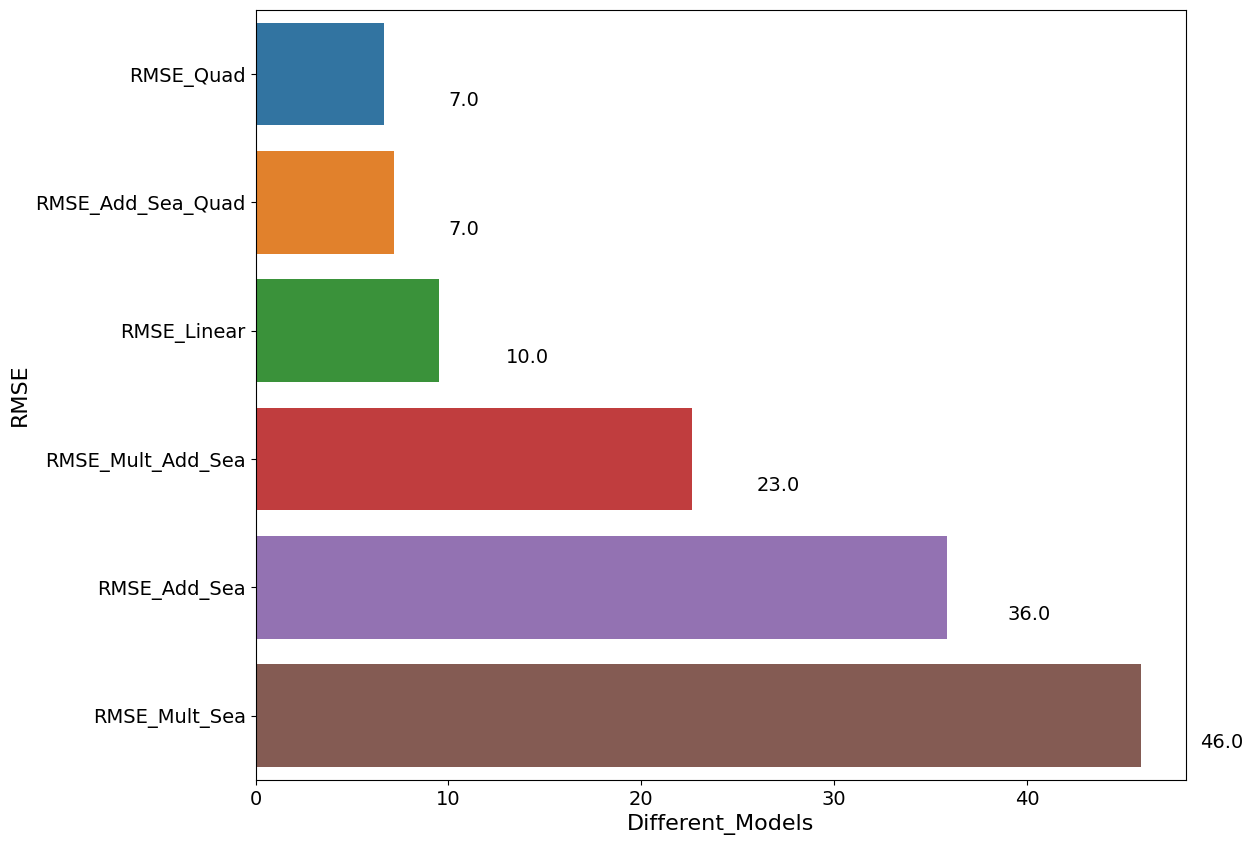

In [30]:
table_evaluation=[]
data = {"Models":pd.Series(["RMSE_Linear","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
e = table_rmse.append(table_evaluation)
#e.drop('MAPE(%)', axis=1, inplace=True)
e.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
f, axe = plt.subplots(1,1, figsize=(12,10))
sns.barplot(x='RMSE_Values', y='Models', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)

plt.show()

Quadrative model is getting less RMSE(root mean squared error)

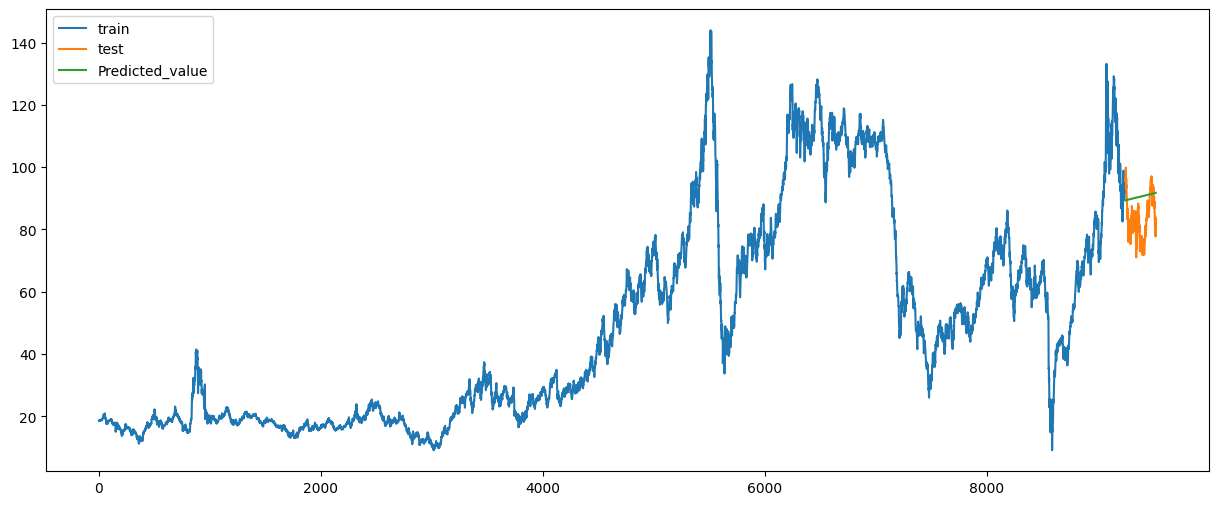

In [31]:
plt.figure(figsize=(15,6))
plt.plot(train_data['Price'],label='train')
plt.plot(test_data['Price'],label='test')
plt.plot(pred_linear,label='Predicted_value')
plt.legend()
plt.show()

##**DATA DRIVEN MODELS**

In [32]:
data1.rename(columns={'DCOILBRENTEU':'Price'},inplace=True)

In [33]:
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print("Result: Stationary (Reject the null hypothesis)")
    else:
        print("Result: Non-Stationary (Fail to reject the null hypothesis)")


# Perform ADF test
adf_test(data1['Price'])

ADF Statistic: -2.1280907501664585
p-value: 0.23337019159397077
Critical Values: {'1%': -3.43105829654376, '5%': -2.861853022083669, '10%': -2.566936616585698}
Result: Non-Stationary (Fail to reject the null hypothesis)


In [34]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    result = kpss(timeseries, regression='c')
    print('KPSS Statistic:', result[1])
    print('p-value:', result[1])
    print('Critical Values:', result[3])

    if result[1] <= 0.05:
        print("Result: Non-Stationary (Reject the null hypothesis)")
    else:
        print("Result: Stationary (Fail to reject the null hypothesis)")

kpss_test(data1['Price'])

KPSS Statistic: 0.01
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Result: Non-Stationary (Reject the null hypothesis)


In [35]:
data1['Price']=data1['Price']-data1['Price'].shift(1) #Differencing
def adf_test(timeseries):
    result = adfuller(timeseries.dropna(), autolag='AIC')
    print('ADF Statistic:', result[1])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print("Result: Stationary (Reject the null hypothesis)")
    else:
        print("Result: Non-Stationary (Fail to reject the null hypothesis)")


# Perform ADF test
adf_test(data1['Price'])

ADF Statistic: 9.247534616304746e-29
p-value: 9.247534616304746e-29
Critical Values: {'1%': -3.43105829654376, '5%': -2.861853022083669, '10%': -2.566936616585698}
Result: Stationary (Reject the null hypothesis)


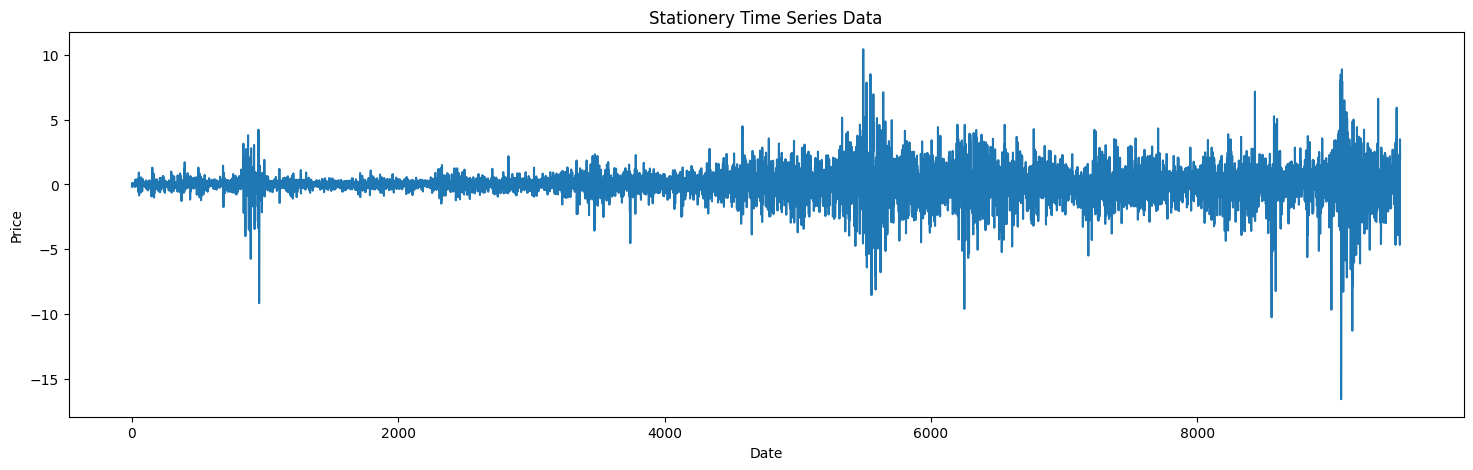

In [36]:
plt.figure(figsize=(18, 5))
plt.plot(data1['Price'])
plt.title('Stationery Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

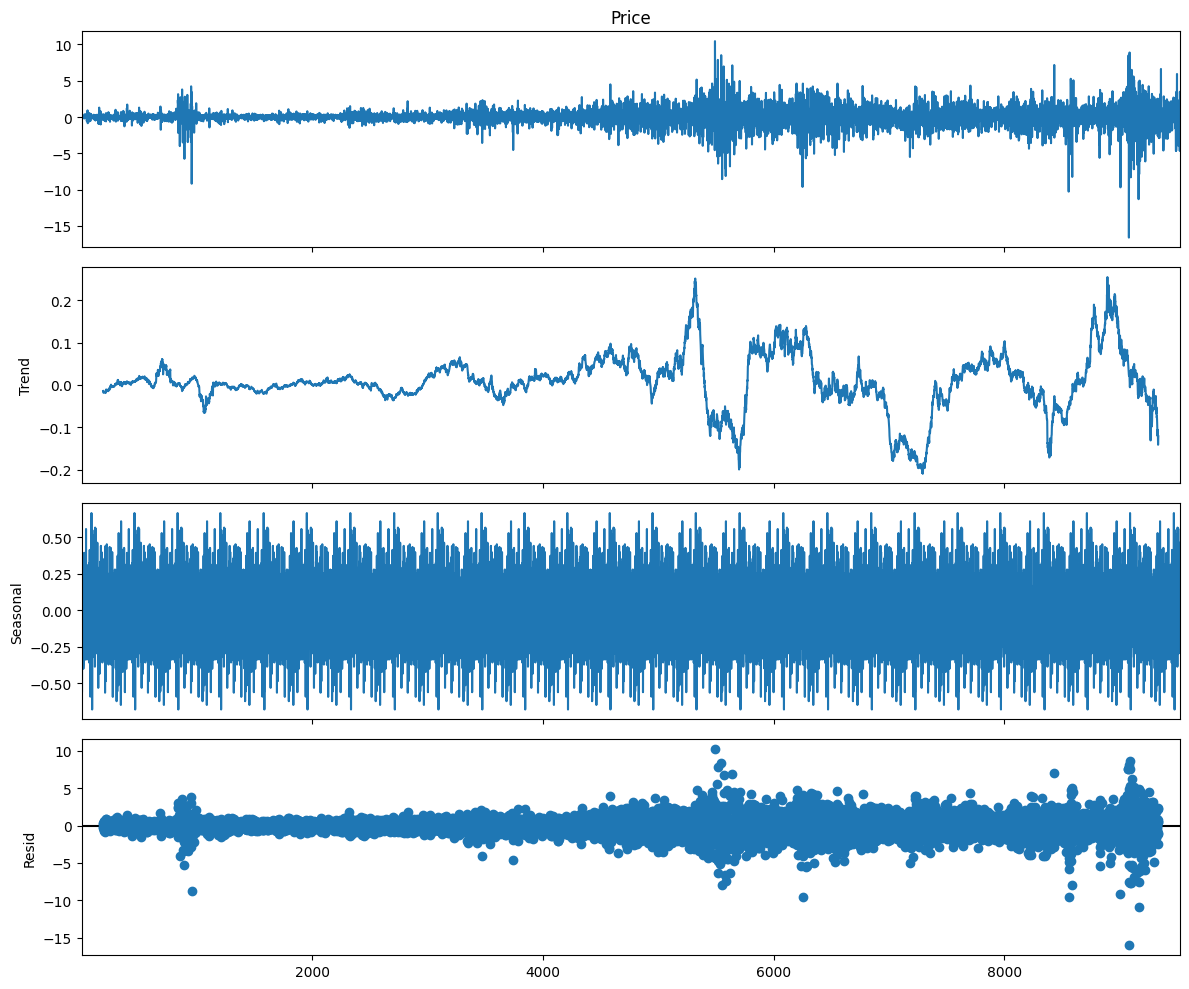

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data1['Price'].dropna(), period=365, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

In [38]:
data1

,DATE,Price
0,1987-05-20,NaN
1,1987-05-21,-0.18
2,1987-05-22,0.10
3,1987-05-25,0.05
4,1987-05-26,0.03
...,...,...
9519,2023-11-14,0.11
9520,2023-11-15,-1.80
9521,2023-11-16,-4.67
9522,2023-11-17,3.49


##**DESICION TREE REGRESSOR**

In [39]:
upload= files.upload()

Saving DCOILBRENTEU.csv to DCOILBRENTEU (1).csv


In [40]:
oil=pd.read_csv('DCOILBRENTEU.csv')

In [41]:
oil['DATE'] = pd.to_datetime(oil['DATE'])
oil['DCOILBRENTEU'] = pd.to_numeric(oil['DCOILBRENTEU'], errors='coerce')

Root Mean Squared Error (RMSE): 0.0


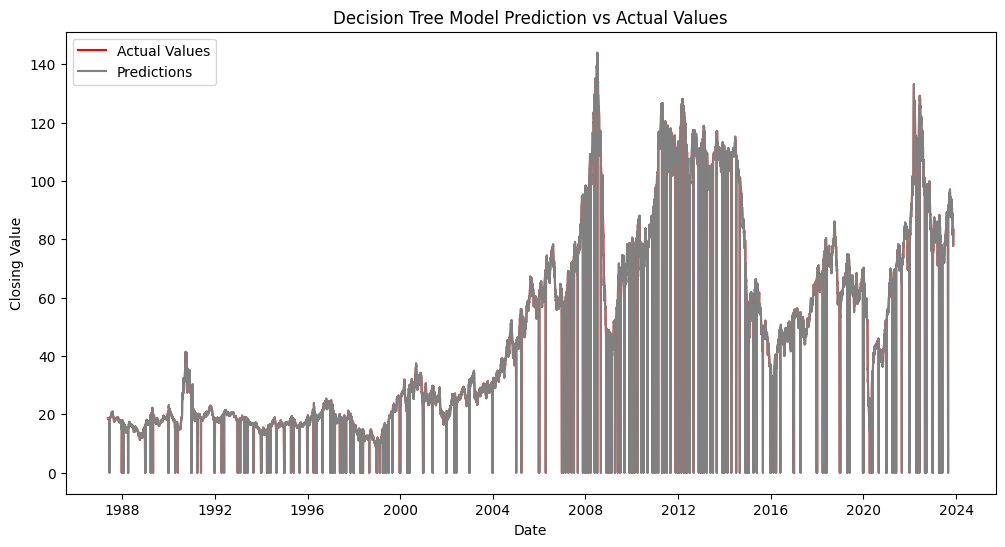

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
df=oil.copy()
# Assuming your DataFrame is named 'df'
# You can adjust this based on your actual DataFrame
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Create features and target
X = np.arange(len(df)).reshape(-1, 1)
y = df['DCOILBRENTEU'].fillna(0).values

# Create and fit the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X, y)

# Generate predictions
predictions = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the original time series and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, y, label='Actual Values',color='red')
plt.plot(df.index, predictions, label='Predictions', color='grey')
plt.title('Decision Tree Model Prediction vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.legend()
plt.show()


Root Mean Squared Error (RMSE): 0.0


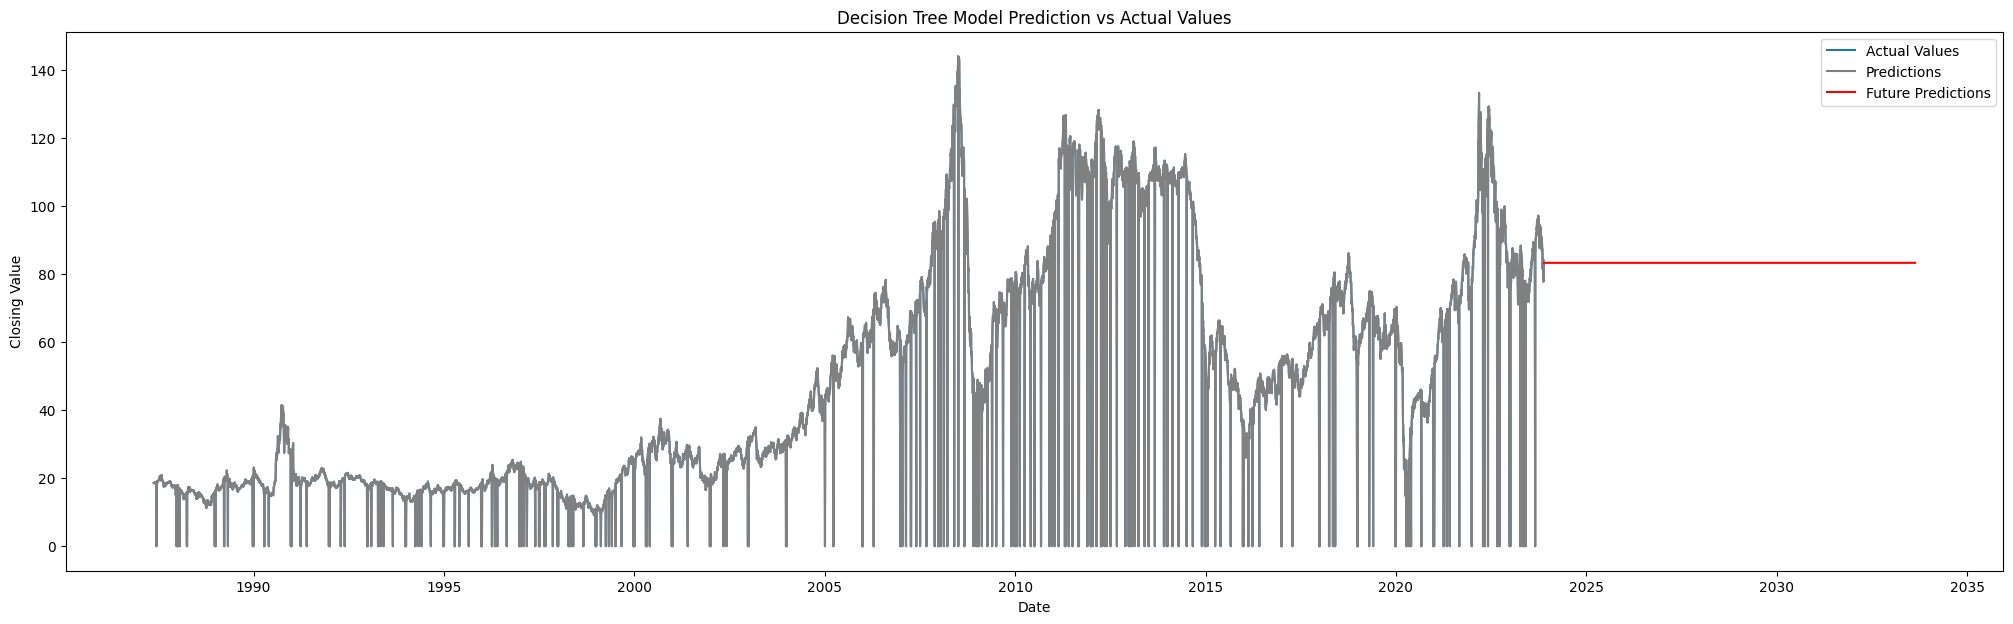

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
df=oil.copy()
# Assuming your DataFrame is named 'df'
# You can adjust this based on your actual DataFrame
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Create features and target
X = np.arange(len(df)).reshape(-1, 1)
y = df['DCOILBRENTEU'].fillna(0).values

# Create and fit the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X, y)

# Generate predictions for the entire period
predictions = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Extend the input features for future dates
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=3560, freq='D')  # Fix: Start from the next day
future_X = np.arange(len(df), len(df) + 3560).reshape(-1, 1)

# Generate predictions for future dates
future_predictions = model.predict(future_X)

# Plot the original time series, predictions, and future predictions
plt.figure(figsize=(25,7))
plt.plot(df.index, y, label='Actual Values')
plt.plot(df.index, predictions, label='Predictions', color='grey')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red', linestyle='-')
plt.title('Decision Tree Model Prediction vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.legend()
plt.show()
